In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

import warnings
warnings.filterwarnings('ignore') 

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer#TfidVectorizer
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier 
from xgboost import plot_importance

import time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv(r"C:\Users\ramni\Downloads\archive(10)\train.csv",encoding='latin1')
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [5]:
df_test  = pd.read_csv(r"C:\Users\ramni\Downloads\archive(10)\test.csv",encoding='latin1' )
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   int64  
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 248.6+ KB


By comparing train and test data sets It can be concluded that "selected_text" colum is missing in test data set therefore text colum will be used for following analysis

In [8]:
df_train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
df_test.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [10]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

In [13]:
df_train.columns = df_train.columns.str.lower()
df_train = df_train.rename(columns={'textid':'text_id','time of tweet':'Time','age of user':'Age','population -2020':'Population',
                                    'land area (km²)':'Area','density (p/km²)':'Density'})
df_test.columns = df_test.columns.str.lower()
df_test = df_test.rename(columns={'textid':'text_id','time of tweet':'Time','age of user':'Age','population -2020':'Population',
                                  'land area (km²)':'Area','density (p/km²)':'Density'})

In [14]:
df_train.head()

,text_id,text,selected_text,sentiment,Time,Age,country,Population,Area,Density
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [15]:
df_test.head()

,text_id,text,sentiment,Time,Age,country,Population,Area,Density
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26


In [16]:
df_train["sentiment"].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

as we can notice dataset is very much balanced 

<Axes: xlabel='Time', ylabel='count'>

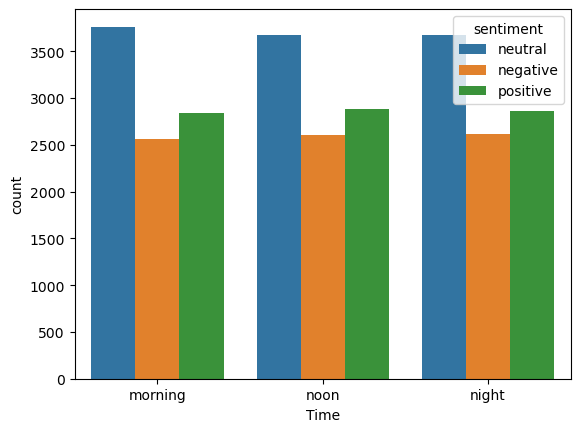

In [17]:
sns.countplot(x = df_train["Time"], hue = df_train["sentiment"])

<Axes: xlabel='Age', ylabel='count'>

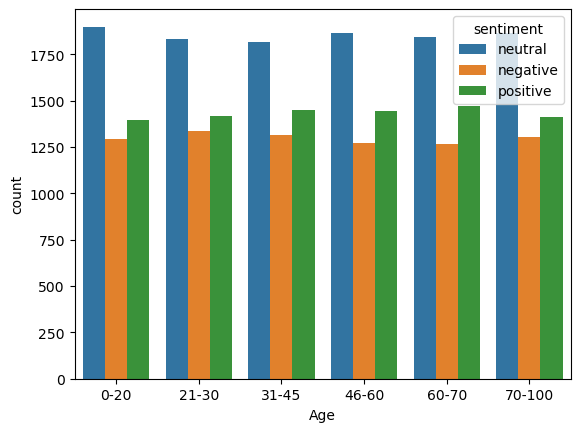

In [18]:
sns.countplot(x = df_train["Age"], hue = df_train["sentiment"])

In [19]:
df_train_1 = df_train[["text","sentiment"]]

In [20]:
# Create a set of stopwords
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def clean_text_vectorized(df):
    # Remove URLs
    df['text'] = df['text'].str.replace(r'https?://\S+', '', regex=True)
    # Remove HTML tags
    df['text'] = df['text'].str.replace(r'<.*?>', '', regex=True)
    # Remove punctuation
    df['text'] = df['text'].str.replace(f'[{string.punctuation}]', '', regex=True)
    # Remove newlines (replace with space)
    df['text'] = df['text'].str.replace(r'\n', ' ', regex=True)
    # Remove alphanumeric words
    df['text'] = df['text'].str.replace(r'\b\w*\d\w*\b', '', regex=True)
    # Convert to lowercase
    df['text'] = df['text'].str.lower()
    # Remove remaining non-alphabetic characters
    df['text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True)
    # Normalize repeated characters
    df['text'] = df['text'].str.replace(r'(.)\1+', r'\1\1', regex=True)

    # Remove stopwords and stem words
    def remove_stopwords_and_stem(text):
        words = text.split()
        words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(words)

    # Apply the function using .apply() on the cleaned text
    vectorized_process_text = np.vectorize(remove_stopwords_and_stem)
    df['text'] = vectorized_process_text(df['text'].values)

# Convert columns to string
df_train_1['text'] = df_train_1['text'].astype(str)
df_test['text'] = df_test['text'].astype(str)

# Clean the text in a vectorized way
clean_text_vectorized(df_train_1)
clean_text_vectorized(df_test)



In [21]:
df_train_1.head()


,text,sentiment
0,id respond going,neutral
1,soo sad miss san diego,negative
2,boss bul,negative
3,interview leav alon,negative
4,son couldnt put releas already bought,negative


In [22]:
df_test.head()

,text_id,text,sentiment,Time,Age,country,Population,Area,Density
0,f87dea47db,last sess day,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,shangha also real excit prec skyscrap gal good...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,recess hit veron branquinho quit company sham,negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,lik,positive,noon,60-70,Angola,32866272,1246700.0,26


In [23]:
X_train,X_test,y_train,y_test = df_train_1["text"],df_test["text"],df_train_1["sentiment"],df_test["sentiment"]

In [24]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))
XV_train = vectorizer.fit_transform(X_train)
XV_test = vectorizer.transform(X_test)

In [25]:
Logic_regg = LogisticRegression().fit(XV_train,y_train)
y_pred_logic  = Logic_regg.predict(XV_test)

In [26]:
Logis_accuracy = metrics.accuracy_score(y_test,y_pred_logic)
Logis_f1 = metrics.f1_score(y_test,y_pred_logic,average = 'weighted')
print("For Logisatic Regression accuracy = {}, and F1 score = {}".format(Logis_accuracy,Logis_f1))

For Logisatic Regression accuracy = 0.7076966610073571, and F1 score = 0.7080565253748584


In [27]:
print(metrics.classification_report(y_test,y_pred_logic))

              precision    recall  f1-score   support

    negative       0.71      0.66      0.68      1001
     neutral       0.66      0.71      0.69      1430
    positive       0.77      0.75      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.71      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534



In [28]:
nb = naive_bayes.MultinomialNB()
nb.fit(XV_train,y_train)
y_pred_Naive_bayes  = nb.predict(XV_test)

In [29]:
Naive_bayes_accuracy = metrics.accuracy_score(y_test,y_pred_Naive_bayes)
Naive_bayes_f1 = metrics.f1_score(y_test,y_pred_Naive_bayes,average = 'weighted')
print("For Naive Bayes accuracy = {}, and F1 score = {}".format(Naive_bayes_accuracy,Naive_bayes_f1))

For Naive Bayes accuracy = 0.6179966044142614, and F1 score = 0.6030462783562727


In [30]:
print(metrics.classification_report(y_test,y_pred_Naive_bayes))

              precision    recall  f1-score   support

    negative       0.80      0.34      0.48      1001
     neutral       0.52      0.87      0.66      1430
    positive       0.81      0.54      0.65      1103

    accuracy                           0.62      3534
   macro avg       0.71      0.58      0.59      3534
weighted avg       0.69      0.62      0.60      3534



In [31]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(XV_train,y_train)
y_pred_Tree = dec_tree.predict(XV_test)

In [32]:
Decision_Tree_accuracy = metrics.accuracy_score(y_test,y_pred_Tree)
Decision_Tree_f1 = metrics.f1_score(y_test,y_pred_Tree,average = 'weighted')
print("For Decision Tree accuracy = {}, and F1 score = {}".format(Decision_Tree_accuracy,Decision_Tree_f1))

For Decision Tree accuracy = 0.6610073571024335, and F1 score = 0.6606166529335558


In [33]:
print(metrics.classification_report(y_test,y_pred_Tree))

              precision    recall  f1-score   support

    negative       0.64      0.65      0.64      1001
     neutral       0.65      0.62      0.64      1430
    positive       0.70      0.72      0.71      1103

    accuracy                           0.66      3534
   macro avg       0.66      0.66      0.66      3534
weighted avg       0.66      0.66      0.66      3534



In [ ]:
param_dist = {
    'n_estimators': [50, 100], 
    'max_depth': [10, 20, 30],   
    'min_samples_leaf': [1, 2], 
    'min_samples_split': [2, 5],  
    'max_features': ["sqrt"],
    'max_samples': [0.5]          
}

rf = RandomForestClassifier(random_state=0)

rf_random = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=10, 
    scoring='f1', 
    refit=True, 
    n_jobs=-1, 
    verbose=1, 
    random_state=0,
    cv=3 
)

print("Training....")
t0 = time.time()
rf_random.fit(XV_train, y_train)
train_time = time.time() - t0
print(f"Train time: {train_time:.3f} seconds")

print("Best parameters found: ", rf_random.best_params_)

Training....
Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, min_samples_leaf = 1, max_samples =  0.5,
max_features = 'sqrt', max_depth = 20,random_state = 42)
rf.fit(XV_train,y_train)
y_pred_rf = rf.predict(XV_test)


In [ ]:
rf_accuracy = metrics.accuracy_score(y_test,y_pred_rf)
rf_f1 = metrics.f1_score(y_test,y_pred_rf,average = 'weighted')
print("For Random Forest accuracy = {}, and F1 score = {}".format(rf_accuracy,rf_f1))

In [ ]:
print(metrics.classification_report(y_test,y_pred_rf))

In [ ]:
print("Unique labels in y_train:", np.unique(y_train))


y_train_encoded = pd.factorize(y_train)[0]  
print("Encoded labels:", np.unique(y_train_encoded))

cv_params = {
    'max_depth': [2, 4, 6],
    'min_child_weight': [1, 3],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [5, 10],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

xgb = XGBClassifier(
    use_label_encoder=False,
    random_state=0,
    eval_metric='mlogloss'
)

xgb_cv = RandomizedSearchCV(
    xgb,
    param_distributions=cv_params,
    n_iter=10,
    scoring='f1',
    refit=True,
    n_jobs=-1,
    verbose=1,
    random_state=0,
    cv=3
)

xgb_cv.fit(XV_train, y_train_encoded)

print("Best parameters found: ", xgb_cv.best_params_)

In [ ]:
xgb_opt = XGBClassifier(subsample = 0.7, n_estimators = 10, min_child_weight = 3, max_depth = 6, learning_rate = 0.01, colsample_bytree = 0.7)
xgb_opt.fit(XV_train,y_train)
y_pred_XGB = xgb_opt.predict(XV_test)

In [ ]:
XGB_accuracy = metrics.accuracy_score(y_test,y_pred_XGB)
XGB_f1 = metrics.f1_score(y_test,y_pred_XGB,average = 'weighted')
print("For Random Forest accuracy = {}, and F1 score = {}".format(XGB_accuracy,XGB_f1))

In [ ]:
print(metrics.classification_report(y_test,y_pred_XGB))

In [ ]:
table = pd.DataFrame({'Model': ["Logistic Regression","Naive Bayes","Decision Tree", "Random Forest","XGBoost model"],
                        'F1':  [Logis_accuracy,Naive_bayes_accuracy,Decision_Tree_accuracy,rf_accuracy,XGB_accuracy],
                        'Accuracy': [Logis_f1,Naive_bayes_f1,Decision_Tree_f1 ,rf_f1,XGB_f1],
                      })
table

Conclusion : Logistic Regression model is giving usa Better result than rest of the models